## Homework 6 : Tables

#### Due Date: Saturday October 21 at 11:59PM ET

In this assignment, we will process data in tables. We will get practice with

- missing entries 
- aggregating values
- linking records
  
The questions guide you step-by-step through these approaches. 

#### Collaboration Policy

You are prohibited from sharing your solutions. You are discouraged from providing guidance or assistance on questions. You should refrain from discussing the assignment with others. Consult the syllabus for information about policies surrounding misconduct.

**Name:** *Alina Wang*

**NetId:** *hw3414*

### Rubric

Question | Points
--- | ---
Question 1.1 | 1
Question 1.2 | 1
Question 1.3 | 1
Question 2.1 | 1
Question 2.2 | 1
Question 2.3 | 1
Question 2.4 | 1
Question 3.1 | 1
Question 3.2 | 1
Question 3.3 | 1
Question 4.1 | 1
Question 4.2 | 1
Question 4.3 | 1
Question 5.1 | 1
Question 5.2 | 1
Question 5.3 | 0
Total | 15

<img src="image.PNG"  width="400" align="right"/>

We will study data from the World Bank. The World Bank is an international financial organization which provides loans to governments of developing countries. 

In Homework 3, we studied 

- literacy rate among adult females 
- gross national income per capita

Here we want to study

- gross domenstic product per capita
- population 
- life expectancy 

Note the difference between gross national income and gross domestic product.  

- Gross domestic product measures the value of domestic goods and services 
- Gross national income measures revenue generated domestically and abroad by residents and businesses.

So the gross national income tends to be higher than the gross domestic product.

### 0. Load Packages

We have been working with the

-  `numpy` package for manipulations of arrays
-  `matplotlib` package for generating charts
- `pandas` package for handling tables 

Here we will focus on operations in `pandas` including the join operation

In [2]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

plt.rcParams['figure.figsize'] = (10,8)

In [3]:
# TEST

import sys

assert "numpy" in sys.modules and "np" in locals()
assert "pandas" in sys.modules and "pd" in locals()
assert "matplotlib" in sys.modules and "plt" in locals()

Note that we changed some of the default settings in `pandas` with `set_option` and in `matplotlib` with `rcParams`. 

### Question 1

Before we can understand the information about gross domestic product, we need to load and rearrange the data from `world_bank_gdp.csv`. 

#### Question 1.1

Use the `pandas` function `read_csv` to load the data from `world_bank_gdp.csv`. Store the table in the variable `gdp`.

In [4]:
gdp = pd.read_csv("world_bank_gdp.csv")

In [5]:
# TEST 

assert gdp.shape == (260, 214)


#### Question 1.2

Use the `pandas` function `set_index` to make the column `GDP per capita` the index of the table. 

In [6]:
column = "GDP per capita"
gdp.set_index(column, inplace=True)

In [7]:
# TEST 

assert gdp.index.name == "GDP per capita"


Now we can use `transpose` to switch the rows and columns of the table. 

In [8]:
gdp = gdp.transpose()

#### Question 1.3

Remember the `pandas` function `to_datetime` from Homework 4. We want to change the year to a `datetime` object. 

Specify the format as a string. Note each entry represents a year.

In [9]:
format_string = "%Y"
gdp.index = pd.to_datetime(gdp.index, format = format_string)

In [10]:
# TEST

assert all(gdp.index.year == np.arange(1800, 2013, 1))


### Question 2

We need to handle missing values.

#### Question 2.1

Use the `pandas` function `replace` to substitute `np.NaN` for `Missing` in the table. Remember that we need to specify a dictionary for `replace`. 

In [11]:
dictionary_for_replacement = {'Missing': np.NaN}

gdp.replace(dictionary_for_replacement, inplace=True)

In [12]:
# TEST

assert all(~gdp.isin(["Missing"]))

#### Question 2.2

We want to filter the rows of the table. We will remove any year before 2000 and any year following 2010. 

Fill in the missing pieces of the logical expression for fitering `gdp`.

In [13]:
lower_bound = 1999
upper_bound = 2011

gdp = gdp[(lower_bound < gdp.index.year) & (gdp.index.year < upper_bound)]

In [14]:
# TEST

assert all(gdp.index.year == np.arange(2000, 2011, 1))

#### Question 2.3

We want to set the `pandas` function `dropna` to drop any columns containing `np.NaN`. Since we must drop columns not rows, we need to specify a value for the argument `axis`. Determine the appropriate value for `axis` to drop columns not rows.

In [15]:
axis_value = 1

gdp.dropna(axis=axis_value, inplace=True)

In [16]:
# TEST

assert all(~gdp.isna())


#### Question 2.4

Use the `pandas` function `astype` to convert the data type of the entries from string to floating point number. You can specify the data type as `float64`.

In [17]:
floating_point_data_type = 'float64'

gdp = gdp.astype(floating_point_data_type)

In [18]:
# TEST

assert np.issubdtype(gdp.values.dtype, np.float64)

### Question 3

Since we have records for 10 years, we want to aggregate the numbers.

#### Question 3.1

Use the `pandas` function `mean` to take the average of the columns.

In [19]:
gdp_averages = gdp.mean()

In [20]:
# TEST

assert gdp_averages.shape == (210,)


#### Question 3.2

Note that `gdp_averages` is a `pandas` Series. We can use the `pandas` function `to_frame` to convert to a `pandas` DataFrame. 

In [21]:
gdp_averages = gdp_averages.to_frame()

By default the name of the column is `0`. Use the `pandas` function `rename` to change from `0` to `Average GDP`. Note that we need to specify a dictionary. 

In [22]:
dictionary_for_renaming = {0 : "Average GDP"}

gdp_averages.rename(columns = dictionary_for_renaming, inplace = True)
gdp_averages

,Average GDP
GDP per capita,
Afghanistan,879.579405
Albania,5444.352044
Algeria,5792.301100
Andorra,35852.541985
Angola,3871.394065
...,...
West Bank and Gaza,4249.883123
Vietnam,2168.536301
"Yemen, Rep.",2275.698137


In [23]:
# TEST

assert all(gdp_averages.columns == "Average GDP")

#### Question 3.3

Use the `pandas` function `max` to compute the maximum value in the `Average GDP` column of `gdp_averages`.

In [24]:
gdp_averages_maximum = max(gdp_averages["Average GDP"])
gdp_averages_maximum

84521.11887727272

In [25]:
# TEST

assert 80000 < gdp_averages_maximum < 90000


Now we can standardize the values in `gdp_averages`. 

In [26]:
gdp_averages_standardized = gdp_averages / gdp_averages_maximum

Having divided by `gdp_averages_maximum`, we have values in `gdp_averages_standardized` between 0 and 1.

### Question 4

Before we can understand the information about population and life expectancy, we need to load and join the data 

#### Question 4.1

Use the `pandas` function `read_csv` to load the data from `world_bank_country.csv`. Store the table in the variable `country`.

In [27]:
country = pd.read_csv("world_bank_country.csv")

In [28]:
# TEST 

assert country.shape == (248, 17)


#### Question 4.2

We are interested in three columns of the table `country`.

In [29]:
country = country[["Country (en)", "Population", "Life expectancy"]]

Use the `pandas` function `set_index` to make the column `Country (en)` the index of the table. 

In [30]:
column = "Country (en)"

country.set_index(column, inplace=True)
country

,Population,Life expectancy
Country (en),,
Afghanistan,33332025,51.3
Egypt,94666993,72.7
Åland Islands,29013,0.0
Albania,3038594,78.3
Algeria,40263711,76.8
...,...,...
Wallis and Futuna,15664,79.7
Christmas Island,2205,0.0
Western Sahara,587020,63.0


In [31]:
# TEST 

assert country.index.name == "Country (en)"


#### Question 4.3

We can use the `pandas` function `merge` to join `gdp_averages_standardized` and `country` on their **indices**. Remember to set

- `left=gdp_averages_standardized`
- `right=country`

to indicate the order. 

In [32]:
gdp_country_merged = pd.merge(left = gdp_averages_standardized, 
                              right = country, 
                              how = 'inner', 
                              left_on = gdp_averages_standardized.index,
                              right_on = country.index)
gdp_country_merged = gdp_country_merged.rename(columns = {'key_0':'Country (en)'}).set_index('Country (en)')
gdp_country_merged

,Average GDP,Population,Life expectancy
Country (en),,,
Afghanistan,0.010407,33332025,51.3
Albania,0.064414,3038594,78.3
Algeria,0.068531,40263711,76.8
Andorra,0.424184,85660,82.8
Angola,0.045804,20172332,56.0
...,...,...,...
Vanuatu,0.043032,277554,73.4
Venezuela,0.119100,30912302,75.8
Vietnam,0.025657,95261021,73.4


In [33]:
assert gdp_country_merged.shape == (194, 3)


### Question 5

Having processed the data in `world_bank_country.csv` and `world_bank_gdp.csv`, we can generate a scatter-plot showing average gross domestic product per capita, life expectancy and population.

#### Question 5.1 

Use the `pandas` function `sort_values` to sort `gdp_country_merged` in descending order by `Average GDP`.

In [34]:
order = False

gdp_country_merged.sort_values('Average GDP', ascending=order, inplace=True)
gdp_country_merged

,Average GDP,Population,Life expectancy
Country (en),,,
Liechtenstein,1.000000,37937,81.9
Luxembourg,0.814430,582291,82.3
Bermuda,0.810917,70537,81.3
Qatar,0.808389,2258283,78.7
Cayman Islands,0.564047,57268,81.2
...,...,...,...
Niger,0.007255,18638600,55.5
Guinea-Bissau,0.006916,1759159,50.6
Zimbabwe,0.006663,14546961,58.0


In [35]:
# TEST 

assert gdp_country_merged['Average GDP'].is_monotonic_decreasing

#### Question 5.2

Since some countries have a large population and some countries have a small population, we will use the logarithm function from Homework 3.

Use the `numpy` function `log` to transform the entries in the `Population` column.

In [36]:
logarithm_function = np.log

gdp_country_merged["Log Population"] = logarithm_function(gdp_country_merged["Population"])
gdp_country_merged

,Average GDP,Population,Life expectancy,Log Population
Country (en),,,,
Liechtenstein,1.000000,37937,81.9,10.543682
Luxembourg,0.814430,582291,82.3,13.274726
Bermuda,0.810917,70537,81.3,11.163893
Qatar,0.808389,2258283,78.7,14.630115
Cayman Islands,0.564047,57268,81.2,10.955497
...,...,...,...,...
Niger,0.007255,18638600,55.5,16.740745
Guinea-Bissau,0.006916,1759159,50.6,14.380346
Zimbabwe,0.006663,14546961,58.0,16.492893


In [37]:
# TEST 

assert "Log Population" in gdp_country_merged.columns


#### Question 5.3

Now we can generate a scatter-plot showing the information in `gdp_country_merged`.

- Horizontal coordinate is `Log Population`
- Vertical coordinate is `Life Expectancy`
- Size is determined by `Average GDP`

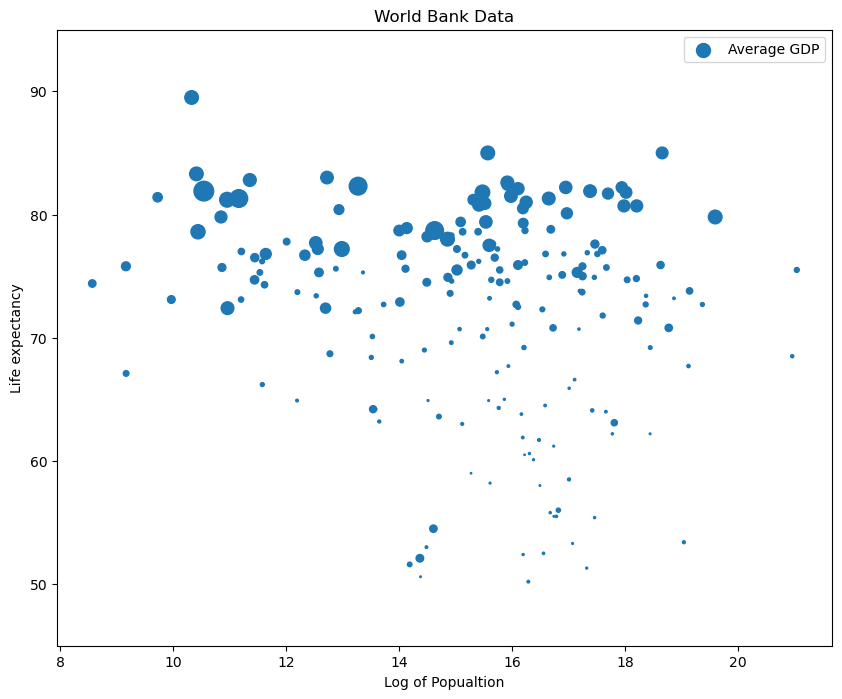

In [38]:
plt.scatter(gdp_country_merged["Log Population"], 
            gdp_country_merged["Life expectancy"], 
            s = gdp_country_merged['Average GDP']*200, label="Average GDP");

plt.ylim([45, 95])

plt.ylabel("Life expectancy")
plt.xlabel("Log of Popualtion")
plt.title("World Bank Data")

plt.legend();